In [9]:
# libraries
from matplotlib.axis import XAxis
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn import datasets
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib import colors
import os

saveDir = os.getcwd()

In [10]:
def confidence_ellipse_matplot(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [11]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.head()

,PFAS source,Lake/stream,Species,Tissue,PFBA,PFPA,PFHxA,PFHpA,PFOA,PFNA,...,Me-FOSAA,Et-FOSAA,4:2 FTS,6:2 FTS,8:2 FTS,10:2 FTS,12:2 FTS,14:2 FTS,"PF-3,7-DMOA",HPFHpA
1,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.543,"<0,500","<0,500","<0,500","<0,500","<0,500",...,0,0,"<1,00","<0,750","<1,00",0,0,0,"<1,00","<1,00"
2,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500","<0,500","<0,500","<0,500","<0,500",...,0,0,"<1,00","<0,750","<1,00",0,0,0,"<1,00","<1,00"
3,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500","<0,500","<0,500","<0,500","<0,500",...,0,0,"<1,00","<0,750","<1,00",0,0,0,"<1,00","<1,00"
4,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500","<0,500","<0,500","<0,500","<0,500",...,0,0,"<1,00","<0,750","<1,00",0,0,0,"<1,00","<1,00"
5,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500","<0,500","<0,500","<0,500","<0,500",...,0,0,"<1,00","<0,750","<1,00",0,0,0,"<1,00","<1,00"


In [12]:
# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'AFFF']
AFFF = AFFF[AFFF['Tissue'] == 'Muscle']
AFFF = AFFF.loc[:, (AFFF != 0).any(axis=0)]
AFFF.head()

,PFAS source,Lake/stream,Species,Tissue,PFBA,PFHxA,PFNA,PFDA,PFUnDA,PFDoDA,PFTrDA,PFTeDA,PFBS,PFHxS,PFHpS,L-PFOS,PFDS,FOSA,6:2 FTS,8:2 FTS
1,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.543,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.470,0.0,0.0,0.0,0.0
2,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.230,0.0,0.0,0.0,0.0
3,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.000,0.0,0.0,0.0,1.480,0.0,0.0,0.0,0.0,0.0,0.0,17.600,0.0,0.0,0.0,0.0
4,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.737,0.0,0.0,0.0,0.0
5,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.000,0.0,0.0,0.0,0.679,0.0,0.0,0.0,0.0,0.0,0.0,11.400,0.0,0.0,0.0,0.0


In [13]:
X = lDf[lDf.columns.to_list()[4:len(lDf.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
lDf['PFAS source'] = pd.Categorical(lDf['PFAS source'])
lDf['Categories'] = lDf['PFAS source'].cat.codes
y = lDf['Categories'].to_numpy()
catList = list(lDf['Categories'].drop_duplicates())
names = list(lDf['PFAS source'].drop_duplicates())

# In general, it's a good idea to scale the data prior to PCA.
scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)
#  
pca = PCA(n_components=4)
x_new = pca.fit_transform(eX)
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(eX), columns=['PCA%i' % i for i in range(4)], index=lDf.index)
result['Source'] = list(lDf['PFAS source'])
result['Tissue'] = list(lDf['Tissue'])
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

[0.51073727 0.14046788 0.07772429 0.04443374] 0.7733631821664635


C:\Users\stultsjf\AppData\Local\Temp\ipykernel_28812\3448609441.py:3: RuntimeWarning: invalid value encountered in true_divide
  X[i,:] = X[i,:]/np.sum(X[i,:])


In [14]:
scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)
#  
pca = PCA(n_components=4)
x_new = pca.fit_transform(eX)
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(eX), columns=['PCA%i' % i for i in range(1,5,1)], index=lDf.index)
result['Source'] = list(lDf['PFAS source'])
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(len(loadings))
final = lDf.columns.to_list()[4:len(lDf.columns)-1]

components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Tissue"] = lDf['Tissue'].str.strip()
components = components[~components['Source'].isna()]


[0.51073727 0.14046788 0.07772429 0.04443374] 0.7733631817294219
38


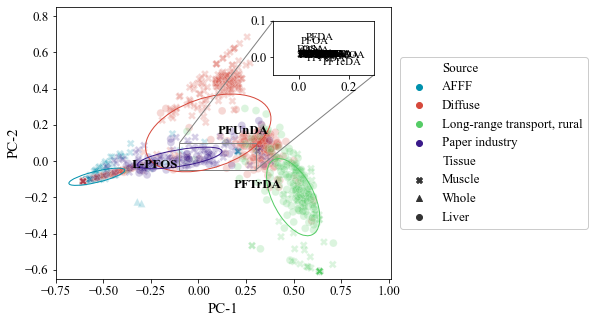

In [15]:
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "Times New Roman"

cL = ['#0091ad', '#D6493C', '#55CC66', '#3A1A8A']
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Source', style='Tissue', ax = ax1, s = 60, alpha= 0.21, 
                palette=cL, markers=['X','^','o'])
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
ax1.set_xlim(-0.75, 1.01)
ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.65,0.75,0.3,0.2])
ax2.set_axes_locator(ip)
ax2.set_xlim(-.1, 0.3)
ax2.set_ylim(-0.05, 0.1)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 11
            )
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Source'].drop_duplicates()), cL):
    dummy = components[components['Source'] == s]
    if len(dummy['PC-1']) > 2:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])

        confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        
ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)

plt.savefig('images\\FractionPCA_inset_ellipse.png', bbox_inches = 'tight', dpi =400)
plt.show()
